In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
# from node2vec import Node2Vec

df0 = pd.read_csv('Kenntnisse und Einstellungen im Finanzbereich.csv')
df0.drop(columns='Timestamp',inplace=True)
df1 = pd.read_csv('Attitudes and Knowledge Regarding Finance.csv')
df1.drop(columns='Timestamp',inplace=True)

In [2]:
df0.columns

Index(['Alter', 'Geschlecht', 'Nationalität',
       'Was entspricht Ihrer zuletzt abgeschlossenen Ausbildung?',
       'Was entspricht Ihrer aktuellen primären Tätigkeit?',
       'Wie hoch ist Ihr ungefähres Jahreseinkommen?',
       'Sind Sie aktuell in Wertschriften wie Aktien, Obligation, Anlagefonds oder ETFs investiert? Falls nicht, könnten Sie sich vorstellen Ihr Geld anzulegen? ',
       'In was für Anlagen sind Sie primär investiert, respektive in welche Anlagen könnten Sie sich vorstellen primär zu investieren?',
       'Ich tendiere für heute zu leben, der morgige Tag wird für das Seine sorgen.',
       'Ich bevorzuge es Geld auszugeben anstelle das Geld langfristig zu sparen.',
       'Geld ist dazu da um ausgegeben zu werden.', 'Antwort in Prozent:',
       'Mögliche Antworten', 'Antwort in CHF', 'Mögliche Antworten.1',
       'Mögliche Antworten.2', 'Mögliche Antworten.3', 'Mögliche Antworten.4'],
      dtype='object')

In [3]:
mapper = list(['age','gender','nationality','education','employment','income','invested','inv_pref','att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7'])
df0.columns = mapper
df1.columns = mapper
comb = [df0, df1]
df = pd.concat(comb,ignore_index=True)

In [4]:
df.age.describe()

count    103.000000
mean      31.213592
std       12.928651
min       19.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       69.000000
Name: age, dtype: float64

In [5]:
df.drop(columns='nationality',inplace=True)

In [6]:
df.age = df.age.apply(lambda x: 0 if x < 25 else(1 if x < 35 else(2 if x < 50 else(3 if x < 65 else 4))))

df.gender = df.gender.apply(lambda x: 0 if x == 'Mann' or x == 'Male' else 1)

df.education = df.education.apply(lambda x: 0 if x == 'Berufslehre / Matura' or \
                                  x == 'High School / Apprenticeship / Secondary Education' \
                                  else(1 if x == 'Höhere Fachschule' or x == 'Technical College' \
                                       else(2 if x == 'Bachelor (Uni/FH)' or x == "Bachelor's degree" \
                                            else(3 if x == 'Master (Uni/FH)' or x == "Master's degree" else 0))))

df.employment = df.employment.apply(lambda x: 0 if x == 'Ausblidung / Student' or x == 'Student' \
                                    else(1 if x == 'Arbeitstätig' or x == 'Employed' \
                                         else(2 if x == 'Nicht erwerbstätig / Pensioniert / Andere' \
                                              or x == 'Not in the workforce / retired / other' else 3)))

df.income = df.income.apply(lambda x: 0 if x == "CHF 0 - CHF 30'000" or x == "USD 0 - USD 30'000" \
                            else(1 if x == "CHF 30'001 - CHF 50'000" or x == "USD 30'001 - USD 50'000" \
                                 else(2 if x == "CHF 50'001 - CHF 65'000" or x == "USD 50'000 - USD 65'000" \
                                      else(3 if x == "CHF 65'001 - CHF CHF 80'000" \
                                           or x == "USD 65'001 - USD 80'000" \
                                           else(4 if x == "CHF 80'001 - CHF 100'000" or \
                                                x == "USD 80'001 - USD 100'000" else 5)))))

df.invested = df.invested.apply(lambda x: 0 if x == 'Nein' or x == 'No' else 1)

df.inv_pref = df.inv_pref.apply(lambda x: 0 if x == "Weiss nciht" or x == "Do not know" \
                                        else(1 if x == "ETF" or x == "ETFs" \
                                             else(2 if x == "Einzeltitel wie Aktien, Obligationen oder ein Mix (ohne Anlagefonds)" \
                                                  or x == "single securities such as stocks, bonds or a mix (excluding funds)" \
                                                  else(3 if x == "Anlagefonds" or x == "investment funds" else 4))))

df.fink1 = df.fink1.apply(lambda x: 1 if x == 2 else 0)
df.fink2 = df.fink2.apply(lambda x: 1 if x == 'Fahrrad CHF 980' or x == 'Bicycle USD 980' else 0)
df.fink3 = df.fink3.apply(lambda x: 1 if x == 102 or x == 2 else 0)
df.fink4 = df.fink4.apply(lambda x: 1 if x == 'Ja' or x == 'Yes' else 0)
df.fink5 = df.fink5.apply(lambda x: 1 if x == 'Ja' or x ==  'Yes' else 0)
df.fink6 = df.fink6.apply(lambda x: 1 if x == 'Ja' or x == 'Yes' else 0)
df.fink7 = df.fink7.apply(lambda x: 1 if x == 'Merh asl CHF 110' or x == 'More than USD 110' else 0)

In [7]:
df

,age,gender,education,employment,income,invested,inv_pref,att1,att2,att3,fink1,fink2,fink3,fink4,fink5,fink6,fink7
0,1,0,2,3,1,1,1,3,2,3.0,0,1,1,1,1,1,0
1,0,1,2,3,0,0,4,3,2,3.0,0,0,1,1,1,1,0
2,0,0,3,3,0,1,1,4,4,3.0,0,1,1,1,1,1,0
3,1,0,1,1,5,1,2,2,3,3.0,0,1,1,1,1,1,0
4,1,0,2,3,0,1,2,2,3,4.0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1,1,2,1,1,1,1,2,2,2.0,0,1,0,0,1,0,0
99,1,0,2,0,0,1,2,4,4,3.0,0,1,1,1,1,1,0
100,1,1,2,1,2,1,2,3,3,3.0,0,0,0,1,0,0,0
101,1,1,2,0,0,1,3,4,3,1.0,0,1,1,1,1,1,1


In [8]:
df.isna().sum()

age           0
gender        0
education     0
employment    0
income        0
invested      0
inv_pref      0
att1          0
att2          0
att3          1
fink1         0
fink2         0
fink3         0
fink4         0
fink5         0
fink6         0
fink7         0
dtype: int64

In [9]:
df.shape

(103, 17)

In [10]:
df.dropna(inplace=True)
df.att3 = df.att3.astype(int)

In [11]:
# cleaned dataset
df

,age,gender,education,employment,income,invested,inv_pref,att1,att2,att3,fink1,fink2,fink3,fink4,fink5,fink6,fink7
0,1,0,2,3,1,1,1,3,2,3,0,1,1,1,1,1,0
1,0,1,2,3,0,0,4,3,2,3,0,0,1,1,1,1,0
2,0,0,3,3,0,1,1,4,4,3,0,1,1,1,1,1,0
3,1,0,1,1,5,1,2,2,3,3,0,1,1,1,1,1,0
4,1,0,2,3,0,1,2,2,3,4,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,1,0,0,0,1,2,3,2,2,0,0,1,1,1,1,1
98,1,1,2,1,1,1,1,2,2,2,0,1,0,0,1,0,0
99,1,0,2,0,0,1,2,4,4,3,0,1,1,1,1,1,0
100,1,1,2,1,2,1,2,3,3,3,0,0,0,1,0,0,0


In [12]:
X = df
X = X.drop(columns=['inv_pref'])
X['fink']= X[['fink1','fink2','fink3','fink4','fink5','fink6','fink7']].sum(axis=1)
X['att'] = X[['att1','att2','att3']].sum(axis=1)
Y = df[['invested','inv_pref']]

In [13]:
genvars = X.drop(columns=['fink','att','att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7'])

In [14]:
genvars.head(3)

,age,gender,education,employment,income,invested
0,1,0,2,3,1,1
1,0,1,2,3,0,0
2,0,0,3,3,0,1


In [15]:
mu_age = np.array(genvars.age.value_counts(normalize=True))
mu_gender = np.array(genvars.gender.value_counts(normalize=True))
mu_education = np.array(genvars.education.value_counts(normalize=True))
mu_employment = np.array(genvars.employment.value_counts(normalize=True))
mu_income = np.array(genvars.income.value_counts(normalize=True))
#mu_inv = np.array(genvars.invested.value_counts(normalize=True))
#mu_inv_pref = np.array(genvars.inv_pref.value_counts(normalize=True))

mu = {}

mu = {'age':mu_age, 'gender':mu_gender, 'education':mu_education, 'employment':mu_employment, 'income':mu_income}

In [16]:
mu

{'age': array([0.48039216, 0.30392157, 0.1372549 , 0.05882353, 0.01960784]),
 'gender': array([0.51960784, 0.48039216]),
 'education': array([0.41176471, 0.3627451 , 0.15686275, 0.06862745]),
 'employment': array([0.46078431, 0.2745098 , 0.21568627, 0.04901961]),
 'income': array([0.49019608, 0.18627451, 0.08823529, 0.08823529, 0.07843137,
        0.06862745])}

In [17]:
# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40
age_beta4 = 0.20

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3,age_beta4],
                    [age_beta1,age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta2,age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta3,age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta4,age_beta3,age_beta2,age_beta1,age_alpha0]])

# education
edu_alpha0 = 0.85
edu_beta1 = 0.70
edu_beta2 = 0.55
edu_beta3 = 0.40

aff_edu = np.array([[edu_alpha0,edu_beta1,edu_beta2,edu_beta3],
                    [edu_beta1,edu_alpha0,edu_beta1,edu_beta2],
                    [edu_beta2,edu_beta1,edu_alpha0,edu_beta1],
                    [edu_beta3,edu_beta2,edu_beta1,edu_alpha0]])

# employment
emp_alpha0 = 0.90 # self
emp_beta_wf = 0.75 # beta workforce / employed / unemployed vs student
emp_beta_ret = 0.70 # beta retired vs workforce
emp_beta_sr = 0.20 # gen gap student / retired

aff_emp = np.array([[emp_alpha0,emp_beta_wf,emp_beta_sr,emp_beta_wf],
                    [emp_beta_wf,emp_alpha0,emp_beta_ret,emp_beta_wf],
                    [emp_beta_sr,emp_beta_ret,emp_alpha0,emp_beta_ret],
                    [emp_beta_wf,emp_beta_wf,emp_beta_ret,emp_alpha0]])

# income
inc_alpha0 = 0.85
inc_beta1 = 0.70
inc_beta2 = 0.60
inc_beta3 = 0.50
inc_beta4 = 0.40
inc_beta5 = 0.25

aff_inc = np.array([[inc_alpha0,inc_beta1,inc_beta2,inc_beta3,inc_beta4,inc_beta5],
                    [inc_beta1,inc_alpha0,inc_beta1,inc_beta2,inc_beta3,inc_beta4],
                    [inc_beta2,inc_beta1,inc_alpha0,inc_beta1,inc_beta2,inc_beta3],
                    [inc_beta3,inc_beta2,inc_beta1,inc_alpha0,inc_beta1,inc_beta2],
                    [inc_beta4,inc_beta3,inc_beta2,inc_beta2,inc_alpha0,inc_beta1],
                    [inc_beta5,inc_beta4,inc_beta3,inc_beta2,inc_beta1,inc_alpha0]])

# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])


# invested

inv_alpha0 = 0.95
inv_beta1 = 0.50

aff_inv = np.array([[inv_alpha0,inv_beta1],
                    [inv_beta1,inv_alpha0]])

# inv_pref
inv_pref_alpha0 = 0.95 # same
inv_pref_other = 0.80 # other class
inv_pref_noninv = 0.50 # not invested
inv_pref_notknow = 0.70 # not know with investment cats and not invested

aff_inv_pref = np.array([[inv_pref_alpha0,inv_pref_noninv,inv_pref_noninv,inv_pref_noninv,inv_pref_notknow],
                         [inv_pref_noninv,inv_pref_alpha0,inv_pref_other,inv_pref_other,inv_pref_notknow],
                         [inv_pref_noninv,inv_pref_other,inv_pref_alpha0,inv_pref_other,inv_pref_notknow],
                         [inv_pref_noninv,inv_pref_other,inv_pref_other,inv_pref_alpha0,inv_pref_notknow],
                         [inv_pref_notknow,inv_pref_notknow,inv_pref_notknow,inv_pref_notknow,inv_pref_alpha0]])


aff = {}
aff = {0:aff_age, 1:aff_gend,2:aff_edu,3:aff_emp,4:aff_inc,5:aff_inv}

In [18]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v) 

In [19]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [20]:
A = A + A.T - np.diag(np.diag(A))
np.sum(A) / 2

509.5

In [21]:
G = nx.from_numpy_matrix(A)

In [22]:
nx.is_connected(G)

True

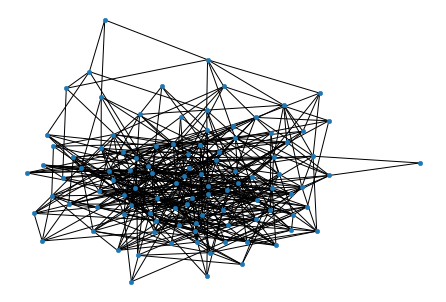

In [23]:
nx.draw(G,node_size=20)

In [24]:
features = pd.Series(Y['invested'])

In [25]:
legend = features.to_dict()

In [26]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    elif i[1] == 1:
        color_map.append('blue')
    elif i[1] == 2:
        color_map.append('yellow')
    elif i[1] == 3:
        color_map.append('pink')
    else:
        color_map.append('purple')

In [27]:
pos = nx.spring_layout(G)

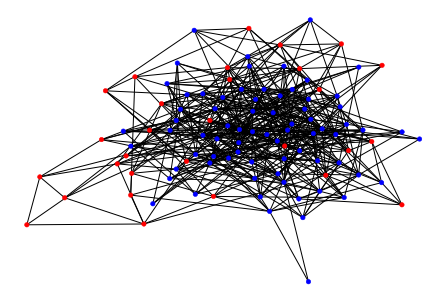

In [28]:
nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
plt.show()

In [139]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7'])

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.6)

In [143]:
G_dgl.ndata['train mask']

tensor([ True, False,  True,  True,  True,  True, False, False, False,  True,
         True,  True, False, False, False,  True, False,  True,  True, False,
        False,  True, False, False, False, False,  True, False,  True, False,
        False,  True,  True, False,  True, False,  True, False,  True, False,
         True,  True, False, False,  True, False, False,  True, False, False,
         True, False, False,  True,  True,  True, False,  True, False,  True,
         True,  True, False, False, False,  True,  True, False, False,  True,
        False,  True, False,  True, False,  True, False, False, False,  True,
         True,  True, False,  True,  True,  True, False,  True, False,  True,
         True,  True,  True, False, False, False, False,  True,  True, False,
        False, False])

In [132]:
from dgl.nn.pytorch import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# The first layer transforms input features of size of 5 to a hidden size of 5.
# The second layer transforms the hidden layer and produces output features of
# size 2, corresponding to the two groups of the karate club.
net = GCN(8, 5, 2)

In [133]:
inputs = embedding
labeled_nodes = torch.tensor([20, 86])  # only the instructor and the president nodes are labeled
labels = torch.tensor([0, 1])  # their labels are different

In [134]:
y = torch.tensor(features)

In [135]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
plot_loss = []
for epoch in range(100):
    logits = net(G_dgl, inputs)

    # we save the logits for visualization later
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    # we only compute loss for labeled nodes
    loss = F.nll_loss(logp[labeled_nodes], labels)
    #train_acc = (pred[labeled_nodes] == labels).float().mean()
    pred = logp.max(1).indices
    acc = (pred == y).sum().item() / pred.size(0)
    optimizer.zero_grad()
    loss.backward()
    plot_loss.append(loss.item())
    optimizer.step()

    print('Epoch %d | Loss: %.4f | acc: %.4f' % (epoch, loss.item(),acc))

Epoch 0 | Loss: 1.3587 | acc: 0.2843
Epoch 1 | Loss: 1.1829 | acc: 0.2843
Epoch 2 | Loss: 1.0168 | acc: 0.2843
Epoch 3 | Loss: 0.8643 | acc: 0.2843
Epoch 4 | Loss: 0.7302 | acc: 0.2843
Epoch 5 | Loss: 0.6198 | acc: 0.2843
Epoch 6 | Loss: 0.5379 | acc: 0.2843
Epoch 7 | Loss: 0.4875 | acc: 0.3529
Epoch 8 | Loss: 0.4676 | acc: 0.5882
Epoch 9 | Loss: 0.4724 | acc: 0.7157
Epoch 10 | Loss: 0.4926 | acc: 0.7745
Epoch 11 | Loss: 0.5169 | acc: 0.7647
Epoch 12 | Loss: 0.5371 | acc: 0.7647
Epoch 13 | Loss: 0.5478 | acc: 0.7549
Epoch 14 | Loss: 0.5467 | acc: 0.7549
Epoch 15 | Loss: 0.5342 | acc: 0.7647
Epoch 16 | Loss: 0.5127 | acc: 0.7647
Epoch 17 | Loss: 0.4832 | acc: 0.7745
Epoch 18 | Loss: 0.4504 | acc: 0.7843
Epoch 19 | Loss: 0.4189 | acc: 0.7745
Epoch 20 | Loss: 0.3930 | acc: 0.7255
Epoch 21 | Loss: 0.3770 | acc: 0.6863
Epoch 22 | Loss: 0.3712 | acc: 0.5980
Epoch 23 | Loss: 0.3726 | acc: 0.5294
Epoch 24 | Loss: 0.3776 | acc: 0.4706
Epoch 25 | Loss: 0.3822 | acc: 0.4020
Epoch 26 | Loss: 0.383

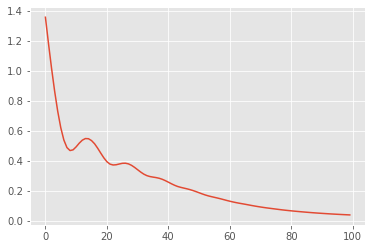

In [136]:
plt.plot(plot_loss)

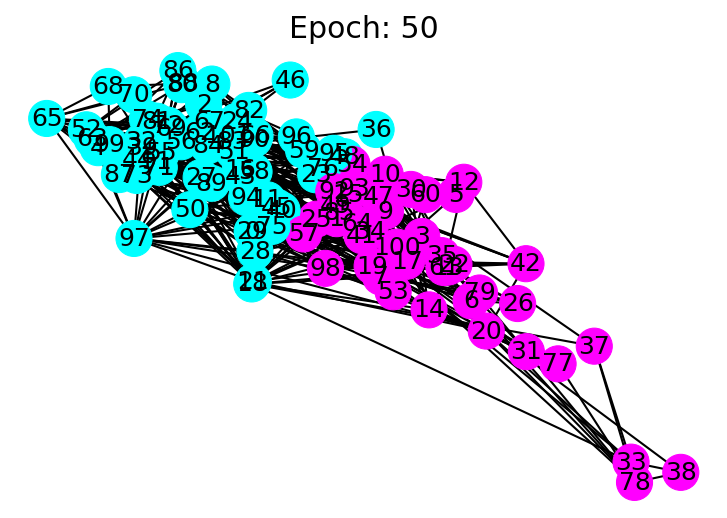

In [94]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(102):
        pos[v] = all_logits[i][v].numpy()
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(G, pos, node_color=colors,
            with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(50)  # draw the prediction of the first epoch
#plt.close()

In [169]:
x_hat = X.drop(columns = ['att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7','invested'])

In [178]:
from sklearn.model_selection import train_test_split
y =  features.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x_hat,y, test_size = 0.2, shuffle=True)

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=150, batch_size=1)

: 0.7143
Epoch 81/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.7763 - val_loss: 0.6999 - val_accuracy: 0.7143
Epoch 82/150
81/81 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8840 - val_loss: 0.6992 - val_accuracy: 0.7143
Epoch 83/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7936 - val_loss: 0.6966 - val_accuracy: 0.7143
Epoch 84/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7531 - val_loss: 0.7098 - val_accuracy: 0.7143
Epoch 85/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.7044 - val_loss: 0.7291 - val_accuracy: 0.7143
Epoch 86/150
81/81 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8052 - val_loss: 0.6939 - val_accuracy: 0.7143
Epoch 87/150
81/81 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8635 - val_loss: 0.7081 - val_accuracy: 0.71

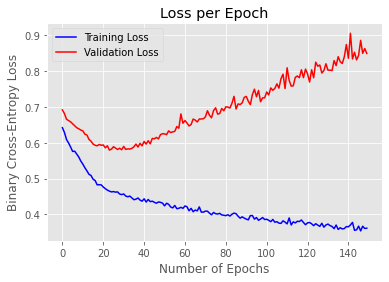

In [180]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

In [173]:
yhat_test = model.predict(x_test) # predict the client classification using the validation data set
# transform the data predicted output to binary data
for i in range(len(yhat_test)):
    if yhat_test[i] > 0.5: # if output of sigmoid function is > 0.5
        yhat_test[i] = 1
    else:
        yhat_test[i] = 0

In [174]:
yhat_train = model.predict(x_train)
for i in range(len(yhat_train)):
    if yhat_train[i] > 0.5: # if output of sigmoid function is > 0.5
        yhat_train[i] = 1
    else:
        yhat_train[i] = 0

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Classification Accuracy training set {}'.format(accuracy_score(y_train,yhat_train)))
print('-------------------------------------------------------------')
print('Classification Accuracy validating set {}'.format(accuracy_score(y_test,yhat_test)))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(y_train, yhat_train))
print('-------------------------------------------------------------')
print('Confusion Matrix validating set:')
print(confusion_matrix(y_test,yhat_test))

Classification Accuracy training set 0.8024691358024691
-------------------------------------------------------------
Classification Accuracy validating set 0.8095238095238095
-------------------------------------------------------------
Confusion Matrix training set:
[[12 12]
 [ 4 53]]
-------------------------------------------------------------
Confusion Matrix validating set:
[[ 3  2]
 [ 2 14]]


In [177]:
import statsmodels.api as sm

log_reg = sm.Logit(y, x_hat).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.474463
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  102
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            6
Date:                Sun, 02 May 2021   Pseudo R-squ.:                  0.2052
Time:                        11:45:21   Log-Likelihood:                -48.395
converged:                       True   LL-Null:                       -60.892
Covariance Type:            nonrobust   LLR p-value:                 0.0003424
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.0044      0.315     -3.185      0.001      -1.623      -0.386
gender        -0.1211      0.

In [181]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_hat, y)
clf.score(x_hat, y)

0.7352941176470589

In [63]:
nx.classes.function.density(G)

0.13706076490001942

In [64]:
cent = nx.algorithms.centrality.eigenvector_centrality(G)

In [65]:
clos_cent = nx.algorithms.centrality.closeness_centrality(G)

In [66]:
be_cent = nx.algorithms.centrality.betweenness_centrality(G)

In [67]:
obj = cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]

Text(0, 0.5, 'Number of Nodes')

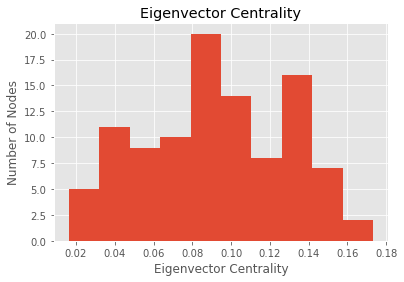

In [68]:
plt.hist(r)
plt.title('Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of Nodes')

In [69]:
obj = clos_cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]

Text(0, 0.5, 'Number of Nodes')

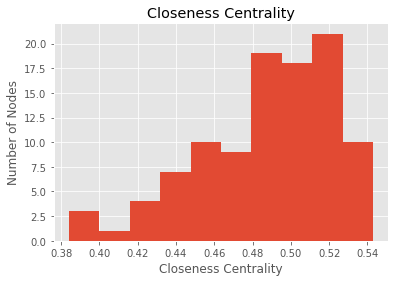

In [70]:
plt.hist(r)
plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')

In [71]:
obj = be_cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]

Text(0, 0.5, 'Number of Nodes')

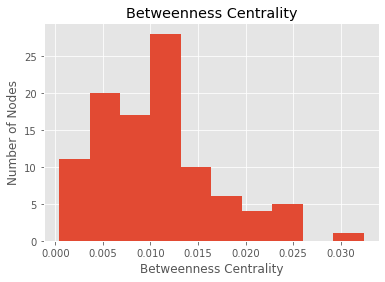

In [72]:
plt.hist(r)
plt.title('Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')

In [73]:
X.corr()

,age,gender,education,employment,income,att1,att2,att3,fink1,fink2,fink3,fink4,fink5,fink6,fink7,fink,att
age,1.000000,-0.270403,-0.044056,0.177671,0.449952,-0.099786,-0.074155,-0.095587,-0.008447,0.056091,0.060349,0.030996,0.115141,0.189813,-0.323138,0.030963,-0.122706
gender,-0.270403,1.000000,-0.204994,-0.276829,-0.365936,-0.111531,-0.027531,-0.032551,-0.095675,-0.132591,-0.127078,-0.136140,-0.099405,-0.307148,0.286899,-0.179449,-0.078891
education,-0.044056,-0.204994,1.000000,0.182032,0.290618,0.105518,0.020263,0.199791,0.056258,0.155926,0.018552,0.225508,-0.062845,0.097250,-0.185383,0.093312,0.150981
employment,0.177671,-0.276829,0.182032,1.000000,-0.078819,-0.033660,0.054598,0.066261,0.166916,0.047479,0.015996,0.070291,-0.127128,0.159878,-0.528750,-0.133802,0.038509
income,0.449952,-0.365936,0.290618,-0.078819,1.000000,-0.106851,0.002479,0.032688,-0.088509,0.078834,0.097429,0.098770,0.149034,0.202389,-0.324266,0.080807,-0.033484
att1,-0.099786,-0.111531,0.105518,-0.033660,-0.106851,1.000000,0.358343,0.207924,-0.116969,-0.092735,-0.112317,0.128329,0.248583,0.070456,0.180710,0.145635,0.715771
att2,-0.074155,-0.027531,0.020263,0.054598,0.002479,0.358343,1.000000,0.378542,0.002634,0.040062,0.045168,0.154660,0.101126,0.130225,-0.019256,0.155958,0.770102
att3,-0.095587,-0.032551,0.199791,0.066261,0.032688,0.207924,0.378542,1.000000,0.174696,0.077168,-0.045545,0.148112,0.125690,0.027075,-0.004404,0.141248,0.724713
fink1,-0.008447,-0.095675,0.056258,0.166916,-0.088509,-0.116969,0.002634,0.174696,1.000000,0.065749,0.027010,0.036334,-0.239637,0.044499,-0.050665,0.058330,0.028093
fink2,0.056091,-0.132591,0.155926,0.047479,0.078834,-0.092735,0.040062,0.077168,0.065749,1.000000,0.073565,-0.108965,0.086737,0.162052,-0.032560,0.526048,0.009869


In [ ]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=2, walk_length=5, num_walks=50, workers=1)

In [ ]:
model = node2vec.fit(window=5, min_count=1, batch_words=2)

In [ ]:
model.wv.save_word2vec_format('embeddings')

In [ ]:
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape